<a href="https://colab.research.google.com/github/surya4331/Ineuron-Test/blob/main/self_assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [1]:
#Mounting the colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [4]:
# Importing the dataset

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/ML/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Dimension of the dataset
print(np.shape(dataset))

(506, 14)


In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.info()

#as we see below there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#understanding the data with Quartile map
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

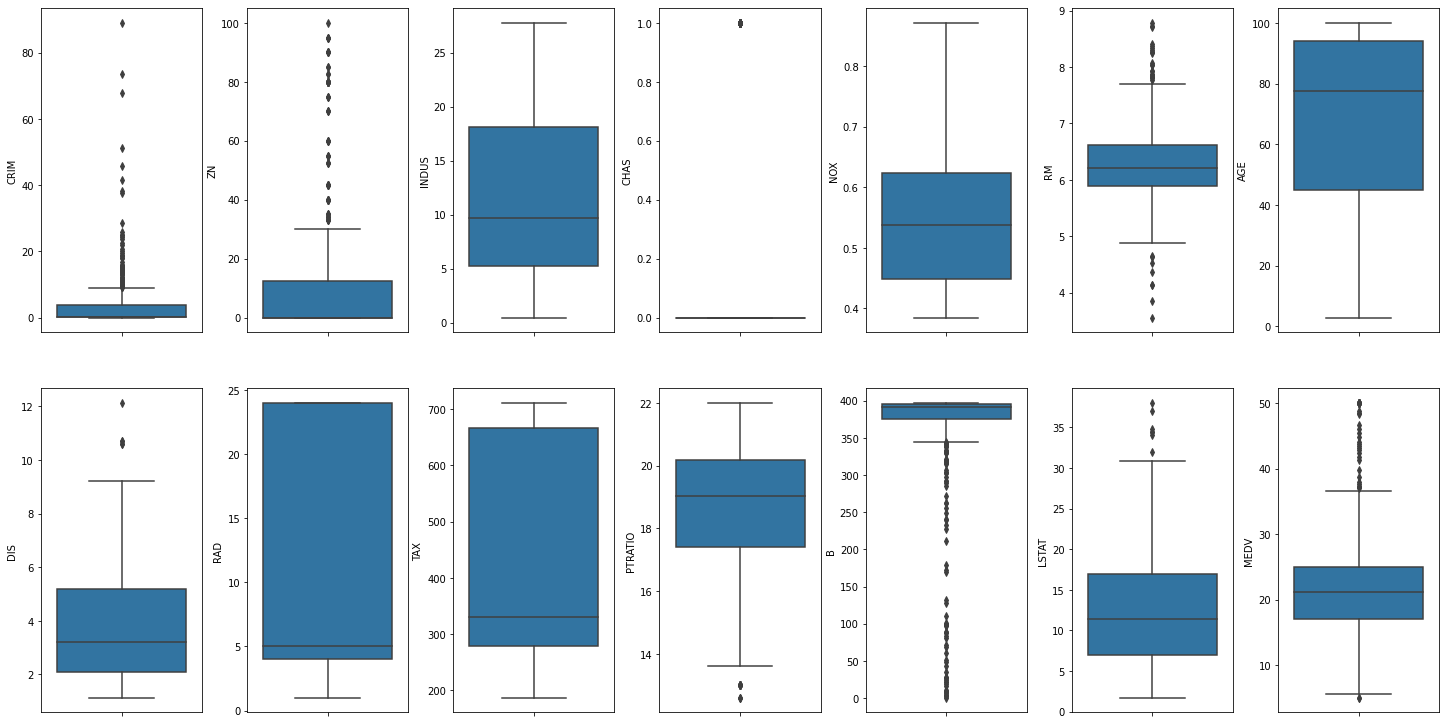

In [ ]:
#figure

fig, axs = plt.subplots(ncols=7, nrows=2, figsize = (20,10))

index = 0
axs = axs.flatten()

for k, v in dataset.items():
  sns.boxplot(y =k, data = dataset, ax = axs[index])
  index += 1


plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

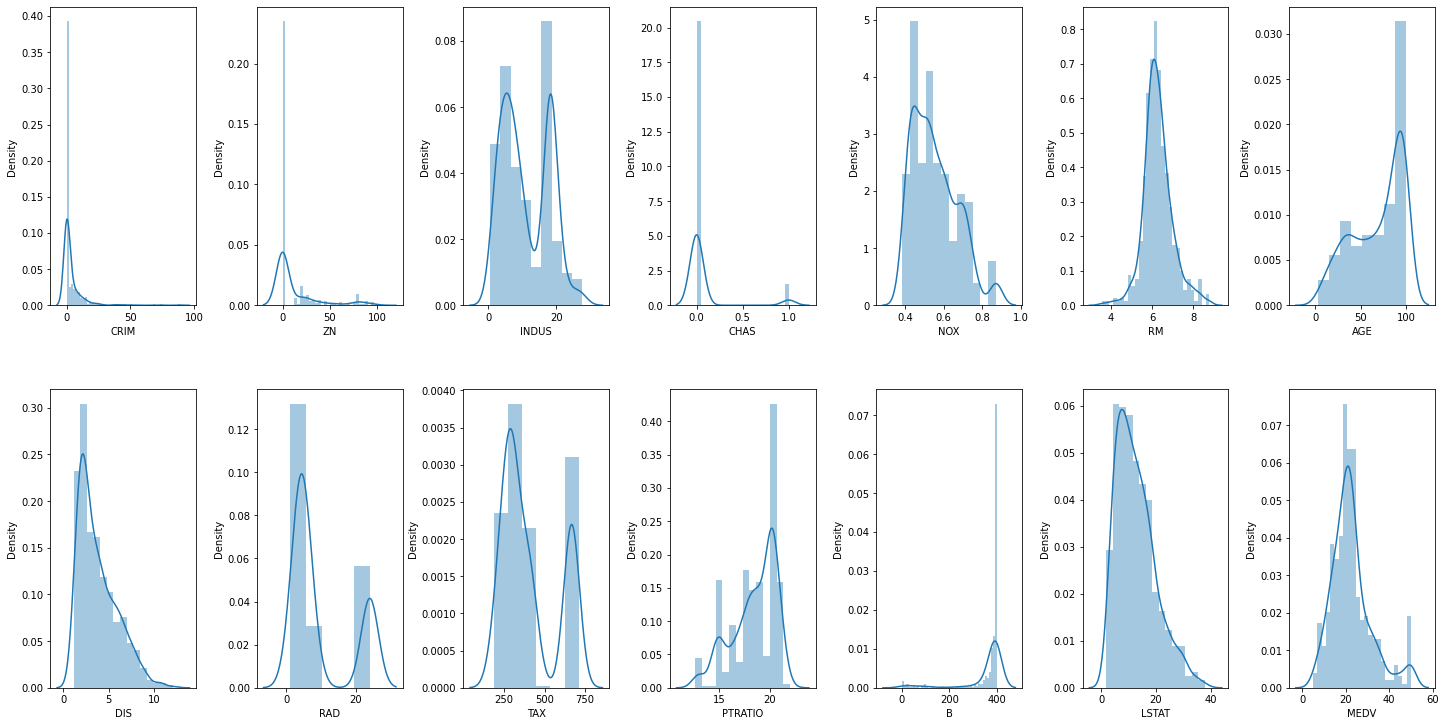

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
dataset.items

<bound method DataFrame.items of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  

clearing outliers from each columns


In [ ]:
for k,v in dataset.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1-1.5*irq) | (v>= q3 +1.5*irq)]

  percentage = np.shape(v_col)[0]*100/ np.shape(dataset)[0]

  print("Column %s outliers = %.2f%%" % (k, percentage))
  #print( f'column {k} outliers = {round(percentage,2)}%')

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


## **16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.**

In [ ]:
dataset = dataset[~(dataset['MEDV'] >= 50.0)]

dataset = dataset[~(dataset['CHAS'] >= 50.0)]

print(np.shape(dataset))

prices = dataset['MEDV']

(490, 14)


In [ ]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $48.80
Mean price: $21.64
Median price $20.90
Standard deviation of prices: $7.86


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

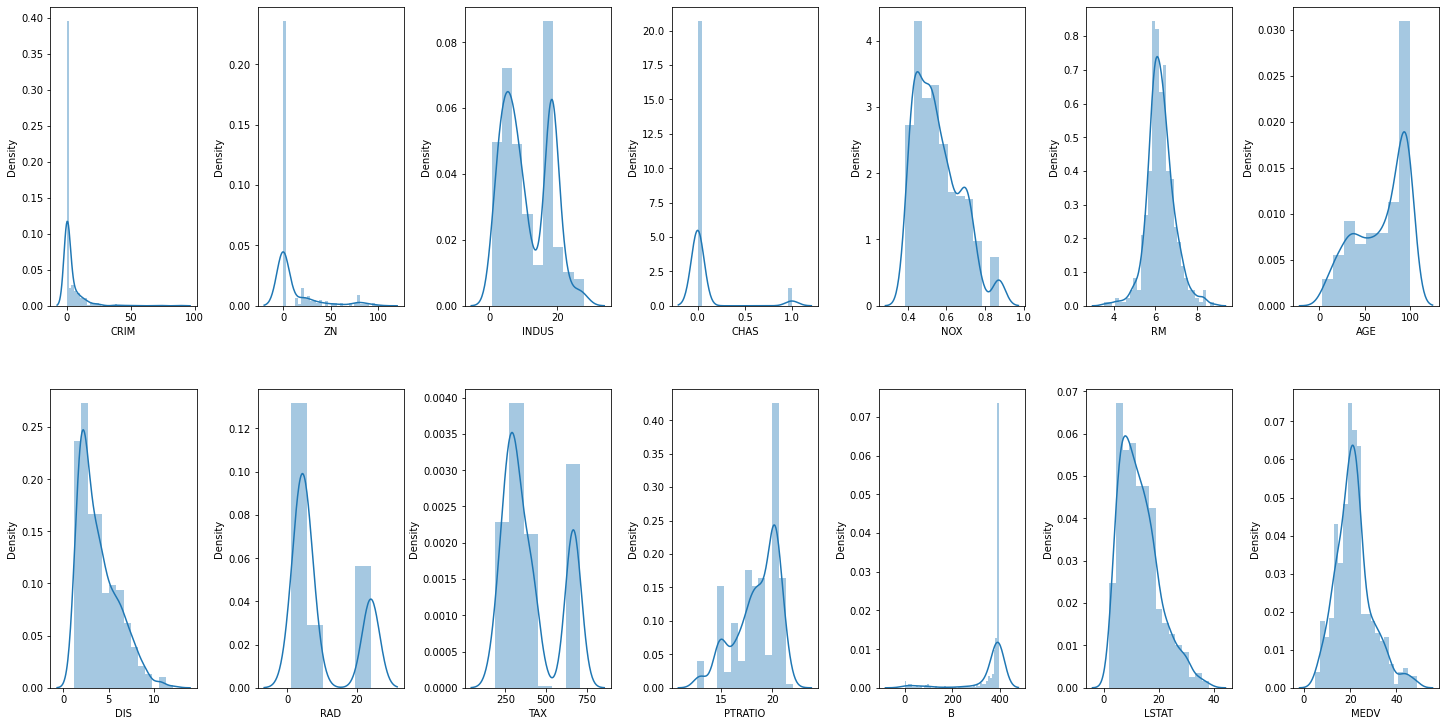

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

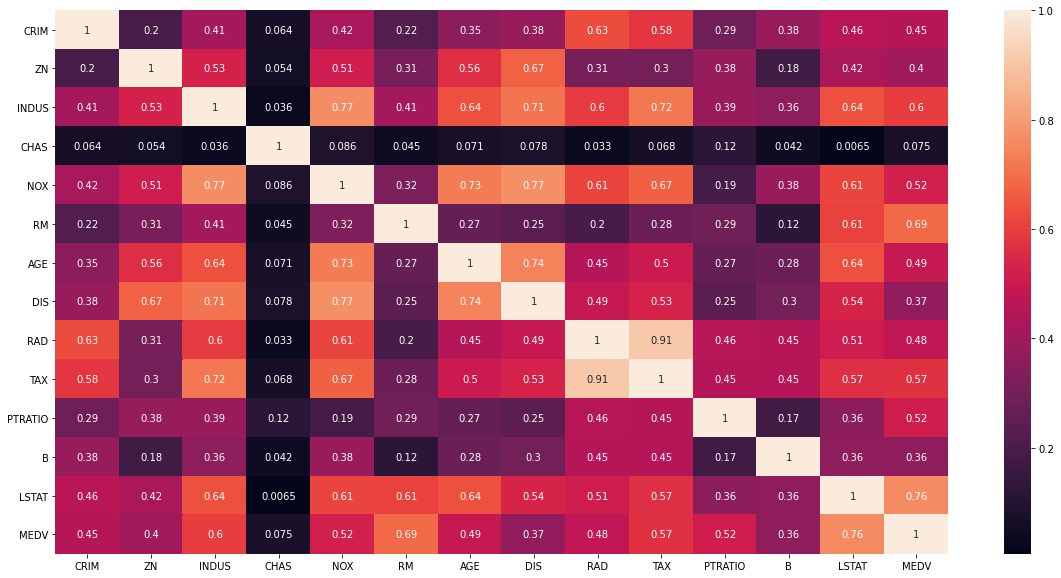

In [ ]:
#correlation heatmap

plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr().abs(),  annot=True)

 * From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

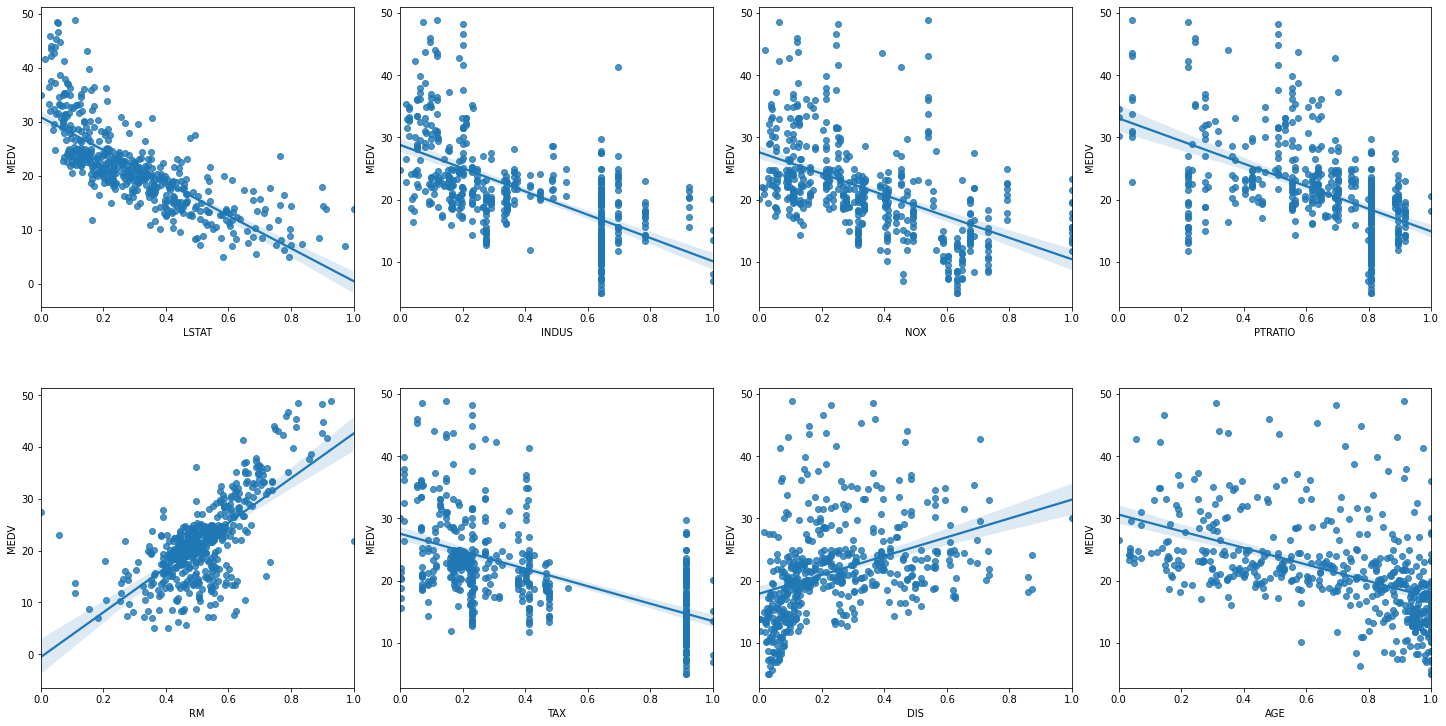

In [ ]:
from sklearn import preprocessing


#lets scale the columns before plotting them against MEDV


min_max_scaler = preprocessing.MinMaxScaler()


column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x  =dataset.loc[:,column_sels]
y = dataset['MEDV']
x= pd.DataFrame(data = min_max_scaler.fit_transform(x), columns=column_sels)

fig, axs = plt.subplots(ncols= 4, nrows= 2 , figsize = (20,10))


index = 0
axs = axs.flatten()

for i,k in enumerate(column_sels):
  sns.regplot(y = y, x = x[k], ax =axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,4.98,2.31,0.538,15.3,6.575,296.0,4.0900,65.2
1,9.14,7.07,0.469,17.8,6.421,242.0,4.9671,78.9
2,4.03,7.07,0.469,17.8,7.185,242.0,4.9671,61.1
3,2.94,2.18,0.458,18.7,6.998,222.0,6.0622,45.8
4,5.33,2.18,0.458,18.7,7.147,222.0,6.0622,54.2
...,...,...,...,...,...,...,...,...
501,9.67,11.93,0.573,21.0,6.593,273.0,2.4786,69.1
502,9.08,11.93,0.573,21.0,6.120,273.0,2.2875,76.7
503,5.64,11.93,0.573,21.0,6.976,273.0,2.1675,91.0
504,6.48,11.93,0.573,21.0,6.794,273.0,2.3889,89.3


In [ ]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)


Copy of Assignment solution:


In [6]:
#Importing the required libraries i.e

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as stats
import numpy as np




In [7]:
working_dir='/content/drive/MyDrive/Almabetter/ML/'
file_name= 'housing.csv'
df=pd.read_csv(working_dir+file_name)

In [8]:
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


#1. First lets try to study the dataset

In [9]:
df.columns  #lets check type of dataset.

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [10]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [11]:
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.01778 95.00 1.470 0 0.4030 7.1350 13...
freq,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [13]:
df.keys()

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [15]:
df.shape

(505, 1)

##We have all the values in form of list of strings which we need to convert to float to make a new data set.

In [16]:
list_of_strings = df.iloc[:,0]

In [17]:
list_of_strings

0       0.02731   0.00   7.070  0  0.4690  6.4210  78...
1       0.02729   0.00   7.070  0  0.4690  7.1850  61...
2       0.03237   0.00   2.180  0  0.4580  6.9980  45...
3       0.06905   0.00   2.180  0  0.4580  7.1470  54...
4       0.02985   0.00   2.180  0  0.4580  6.4300  58...
                             ...                        
500     0.06263   0.00  11.930  0  0.5730  6.5930  69...
501     0.04527   0.00  11.930  0  0.5730  6.1200  76...
502     0.06076   0.00  11.930  0  0.5730  6.9760  91...
503     0.10959   0.00  11.930  0  0.5730  6.7940  89...
504     0.04741   0.00  11.930  0  0.5730  6.0300  80...
Name:  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00, Length: 505, dtype: object

In [18]:
#create function on spliting the dataset

def map_(k):
  s= []
  for i in k:
    n = float(i)
    s.append(n)

  return(s)

In [22]:
a = []

for i in range(len(list_of_strings)):
  a.append(map_(list_of_strings[i].split()))

print(a)

[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

In [27]:
#create the new dataframe from the above variable 'a'

column_names =                         ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
new_df = pd.DataFrame(data= a, columns= column_names)#  ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [28]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
new_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


## From above infoin new dataframe as we see there is no null value contain in the data


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


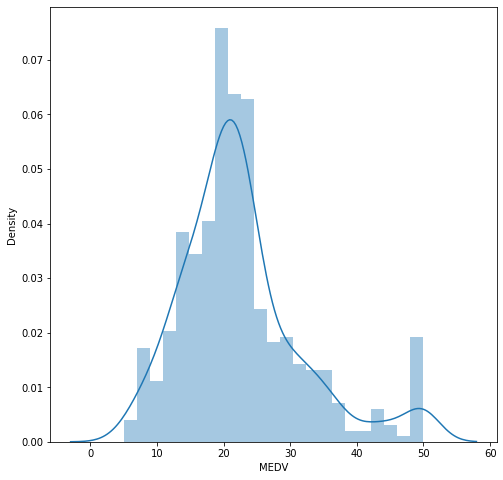

In [34]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['MEDV'])  #its dependent variable 

##The distplot of our dependent variable 'MEDV' shows its is normally distributed with some outliers to the left.

In [ ]:
## plotting independent variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


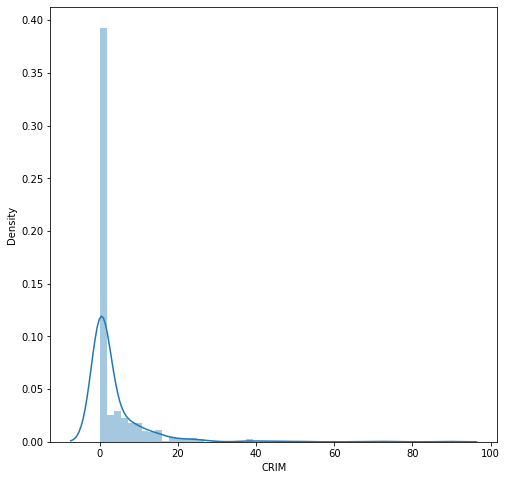

In [35]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['CRIM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


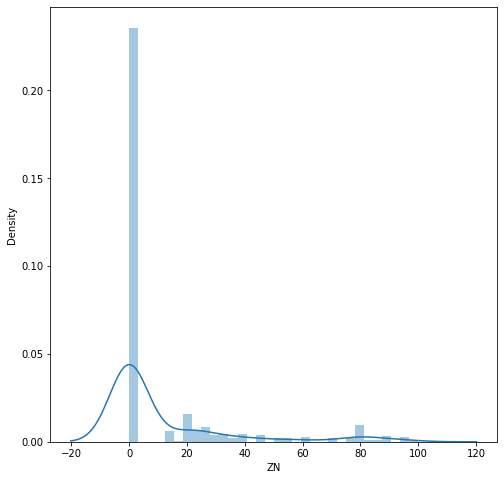

In [36]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['ZN'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


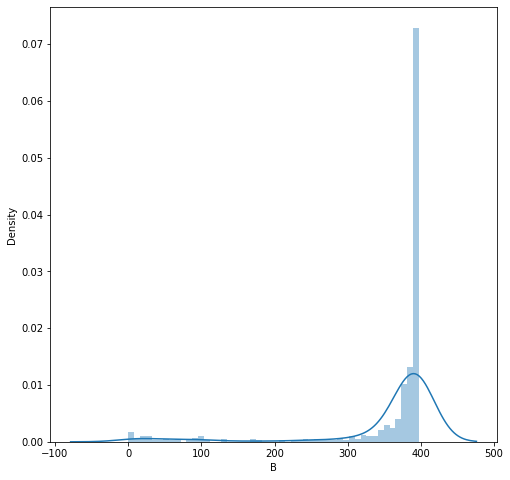

In [38]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['B'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


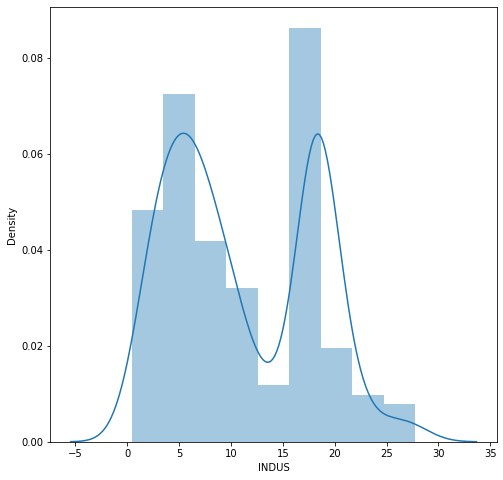

In [39]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['INDUS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


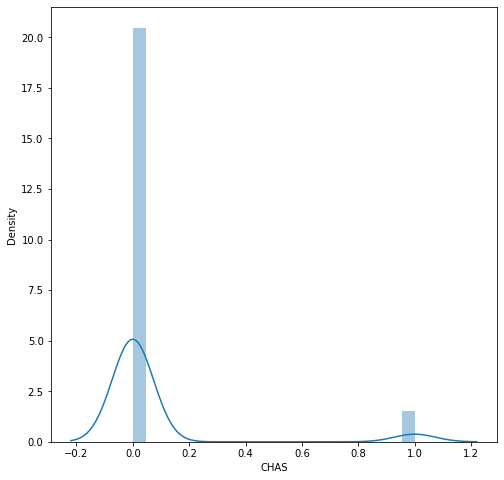

In [40]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['CHAS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


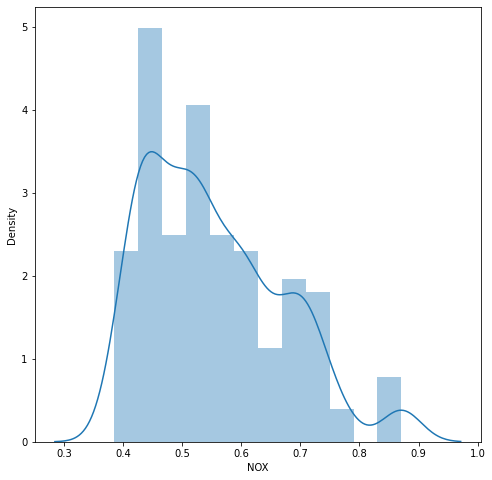

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['NOX'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


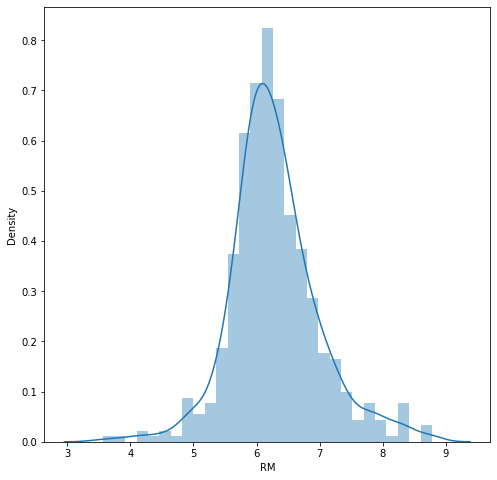

In [42]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['RM'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


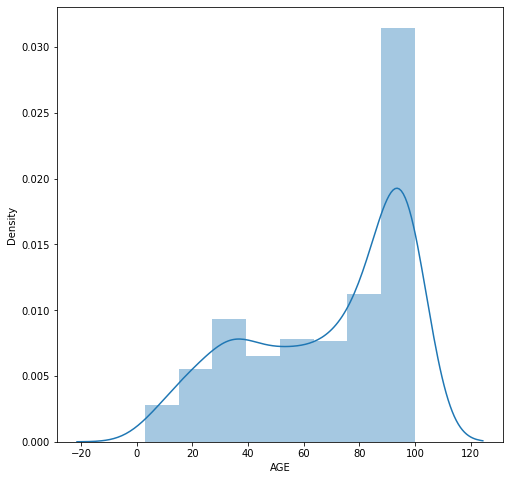

In [43]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['AGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


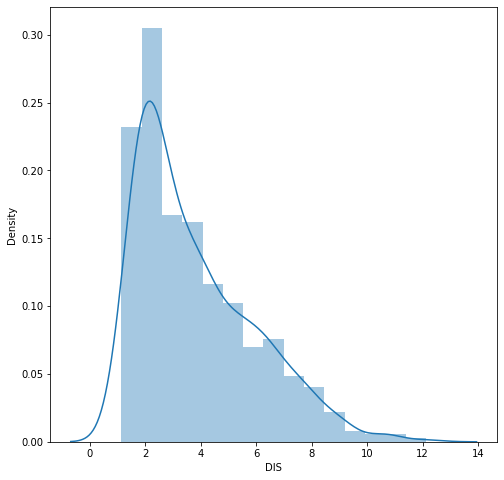

In [44]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['DIS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


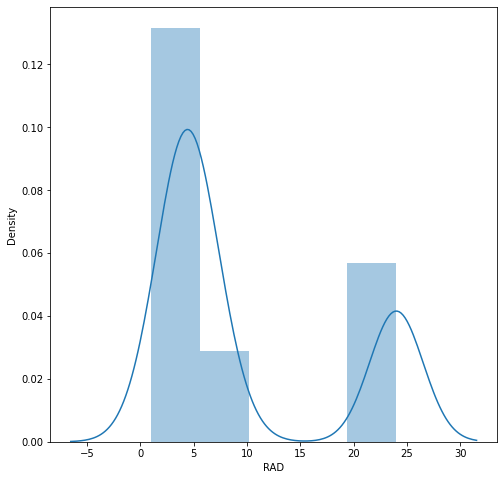

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['RAD'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


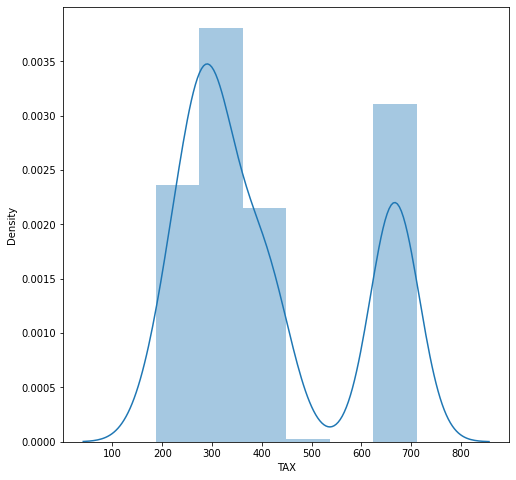

In [46]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['TAX'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


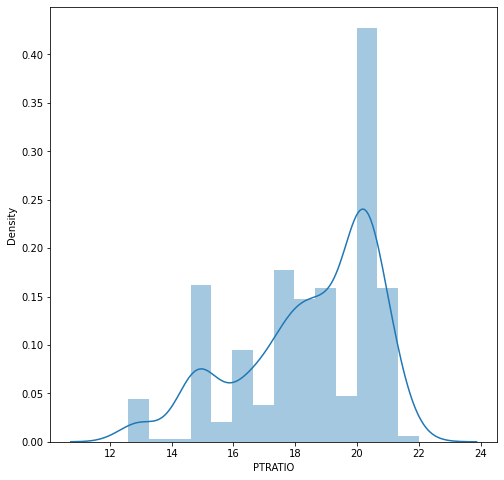

In [47]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['PTRATIO'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


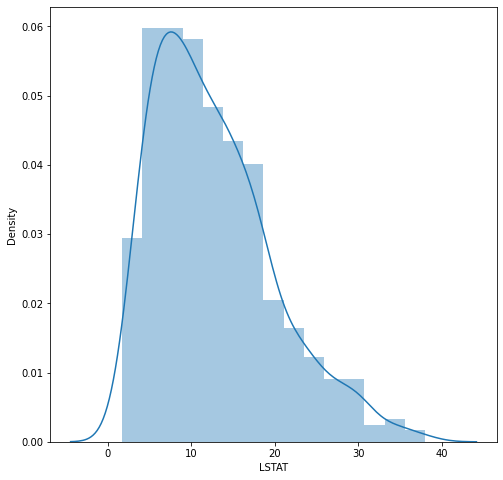

In [48]:
plt.figure(figsize=(8,8))
sns.distplot(new_df['LSTAT'])

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

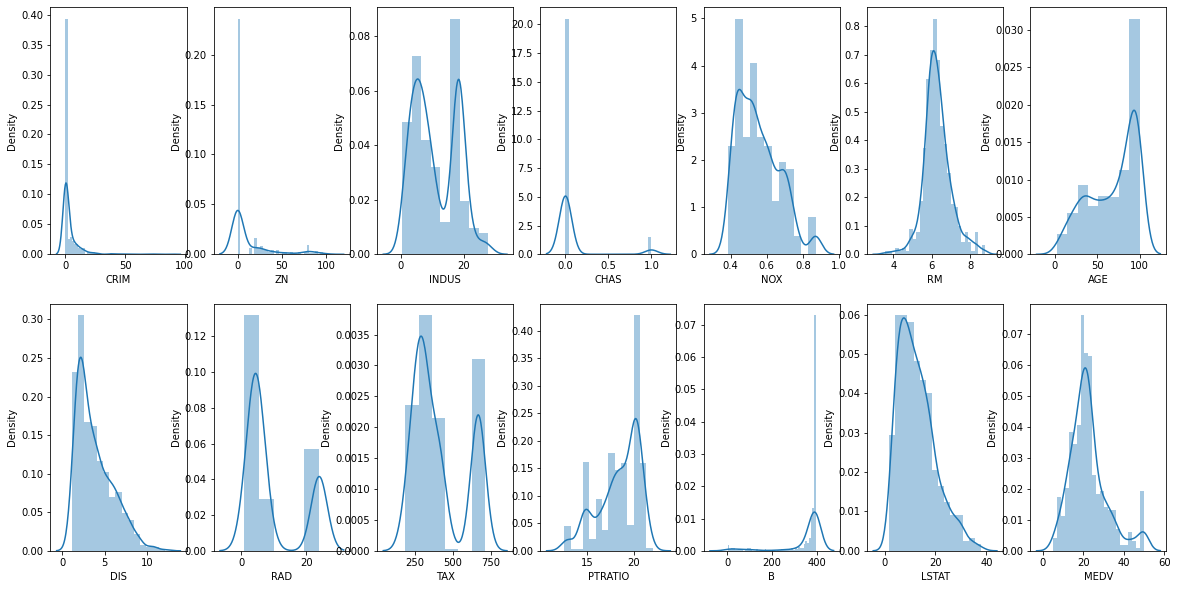

In [54]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize = (20,10))
i = 0
axs = axs.flatten()

for k,v in new_df.items():
  sns.distplot(v, ax=axs[i])
  i+=1

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## lets find the correlation between the dataset

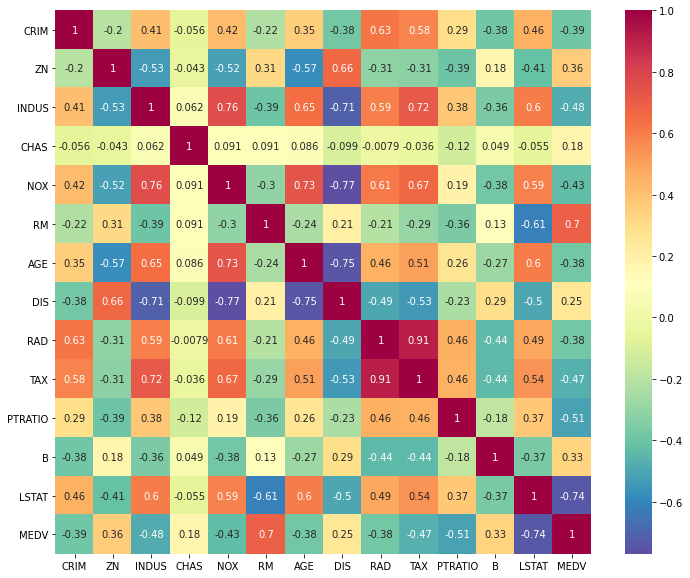

In [55]:
plt.figure(figsize=(12,10))

sns.heatmap(new_df.corr(), annot= True, cmap = 'Spectral_r')

##From the above heatmap we can find about the dependent variable MEDV


*   MEDV is positively correlated to RM.
*   MEDV negatively correlated to LSTAT.

##For the independent Variables:


*   TAX-RAD have highest positive correlation. 0.91
*   ZN-INDUS, AGE-DIS have highest negative correlation. -0.53, -0.75

##We know that to find linear regregression the dependent and independent variables must be linearly related.
##Therefore we can use RM and LSTAT for the same and it would be best to avoid TAX,RAD,ZN,INDUS,AGE,DIS. As these columns exhibit multi-co-linearity.

Text(0, 0.5, 'LSTAT')

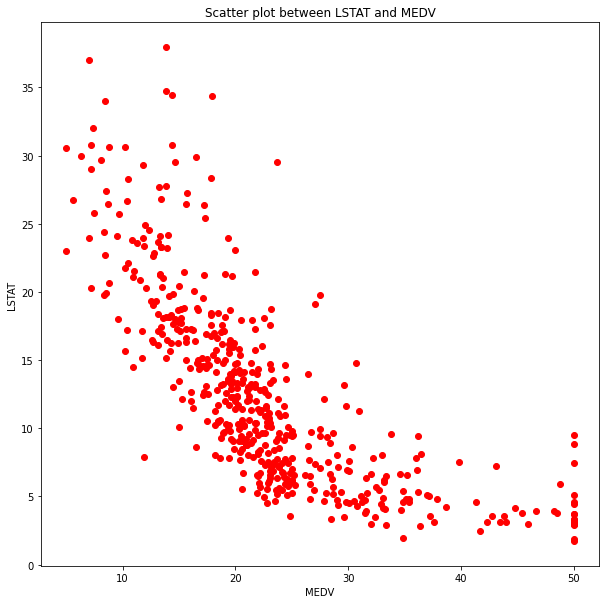

In [57]:
#lets plot correlationplot with dependent variable i.e for LSTAT and MEDV

plt.figure(figsize=(10,10))
x = new_df['MEDV']
y = new_df ['LSTAT']

plt.scatter(x,y, color = 'red')
plt.title('Scatter plot between LSTAT and MEDV')
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

##The above plot suggests negative linear regression, which seconds the heatmap and makes sense if we see the column we can tell as the % of lower status of the population increases, no. of owner-occupied homes in price range of $1000  would decrease.

Text(0, 0.5, 'RM')

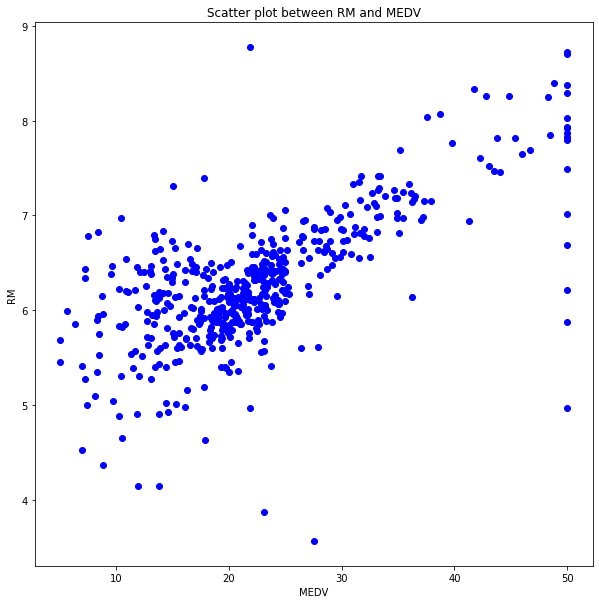

In [59]:
#lets plot correlationplot with dependent variable i.e for RM and MEDV

plt.figure(figsize=(10,10))
x = new_df['MEDV']
y = new_df ['RM']

plt.scatter(x,y, color = 'blue')
plt.title('Scatter plot between RM and MEDV')
plt.xlabel('MEDV')
plt.ylabel('RM')

##The above plot suggests positive linear regression, which again agrees with the heatmap and makes sense if we see the column we can tell as number of rooms per dwelling increase, no. of owner-occupied homes in price range of $1000 would decrease.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


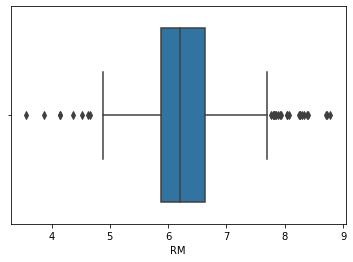

In [60]:
sns.boxplot(new_df['RM'])

In [61]:
new_df['RM'].describe()

count    505.000000
mean       6.284059
std        0.703195
min        3.561000
25%        5.885000
50%        6.208000
75%        6.625000
max        8.780000
Name: RM, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


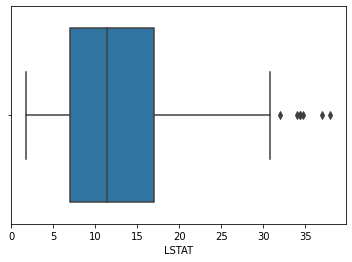

In [62]:
sns.boxplot(new_df['LSTAT'])

In [63]:
new_df['LSTAT'].describe()

count    505.000000
mean      12.668257
std        7.139950
min        1.730000
25%        7.010000
50%       11.380000
75%       16.960000
max       37.970000
Name: LSTAT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


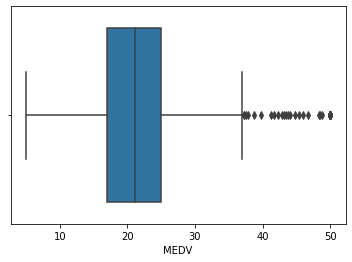

In [64]:
sns.boxplot(new_df['MEDV'])

##LSTAT and RM do not consist a lot of outliers too therefore I would say we can easily consider these columns to make any predictions.

Text(0, 0.5, 'PTRATIO')

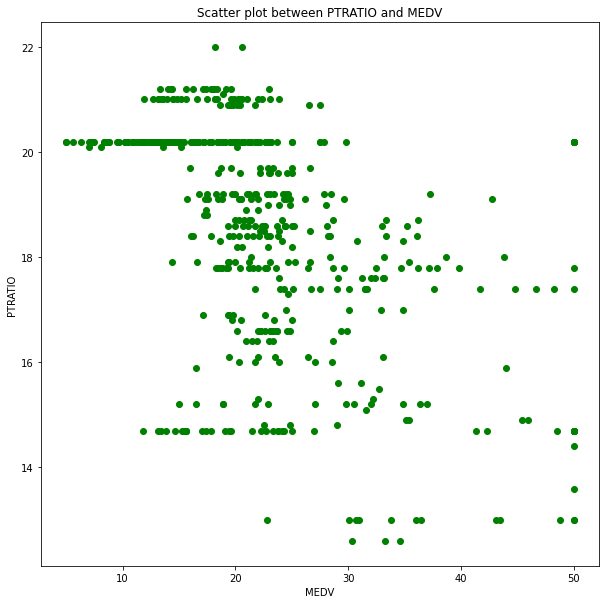

In [67]:
#plot scatter figure between PTRATIO vs MEDV

plt.figure(figsize = (10,10))

x = new_df['MEDV']
y = new_df['PTRATIO']

plt.scatter(x,y, color = 'green')

plt.title('Scatter plot between PTRATIO and MEDV')
plt.xlabel('MEDV')
plt.ylabel('PTRATIO')

##PTRATIO is second highest negative correlated value but as per the first assumption, the relation between dependent and independent variables must be linear which is not here.


##Hence to conclude, LSTAT and RM are the best possible independent variables to make any future predictions about our dependent variable MEDV.

##Calculating the best fit line for RM and MEDV.

In [68]:
rmdf = {'y': new_df['MEDV'], 'x': new_df['RM']}

In [72]:
rmdf  =pd.DataFrame(rmdf)

In [74]:
rmdf['x^2'] = rmdf['x']**2
rmdf['xy'] = rmdf['x']*rmdf['y']

In [75]:
rmdf.head()

,y,x,x^2,xy
0,21.6,6.421,41.229241,138.6936
1,34.7,7.185,51.624225,249.3195
2,33.4,6.998,48.972004,233.7332
3,36.2,7.147,51.079609,258.7214
4,28.7,6.430,41.344900,184.5410


In [76]:
n = len(rmdf['y'])

Below formula for finding the slope of the line b1

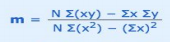

In [79]:
sum_xy = rmdf['xy'].sum()
sum_x = rmdf['x'].sum()
sum_y = rmdf['y'].sum()
s = rmdf['x']**2
x2s=s.sum()

In [81]:
#b1 coefficent 

b1= ((n*sum_xy)-(sum_x*sum_y))/((n*x2s)-(sum_x))
print(b1)

0.11239801390640114


B0 coeffiecient:

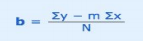

In [83]:
ybar= sum_y/n
xbar= sum_x/n
b0=ybar-(b1*xbar)
print(b0)

21.823585193601446


y=b1(x) +b0

In [84]:
bestfitl= (b1*x)+b0

In [85]:
bestfitl

0      24.251382
1      25.723796
2      25.577679
3      25.892393
4      25.049408
         ...    
500    24.341301
501    24.138984
502    24.509898
503    24.296341
504    23.161122
Name: MEDV, Length: 505, dtype: float64

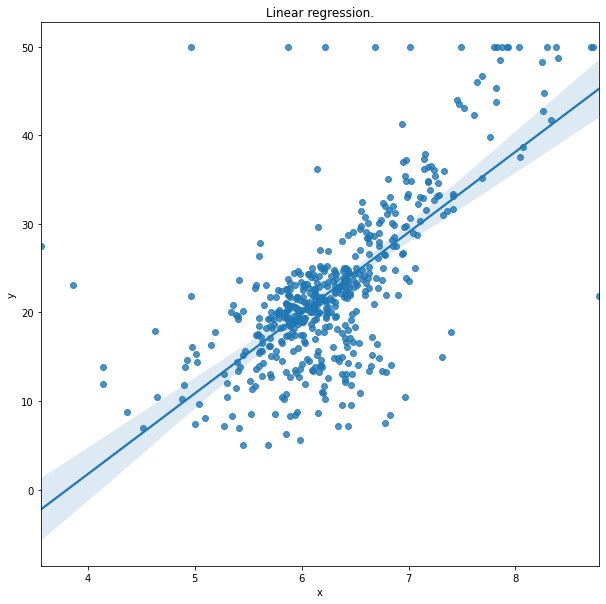

In [86]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('RM')
plt.ylabel('MEDV')
sns.regplot(x=rmdf['x'],y=rmdf['y'])

In [87]:
ldf={'y':new_df['MEDV'],'x':new_df['LSTAT']}
ldf=pd.DataFrame(ldf)
ldf['x2']= ldf['x']**2
ldf['xy']= ldf['x']*ldf['y']

In [88]:
n= len(ldf['y'])
xys=ldf['xy'].sum()
xs=ldf['x'].sum()
ys=ldf['y'].sum()
s=ldf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs))
print(b1)

-0.22913670172915626


In [89]:
ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print(b0)

25.432663713289553


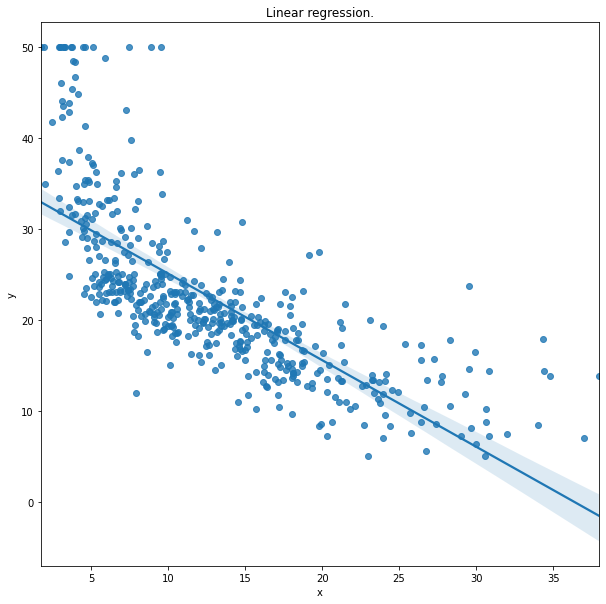

In [90]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
sns.regplot(x=ldf['x'],y=ldf['y'])